In [3]:
import pickle
import matplotlib.pyplot as plt

import numpy as np

In [4]:
with open("parameters_optimization_data.pickle", "rb") as file:
    data = pickle.load(file)

In [5]:
data

{'test cut_off': {(30,
   60,
   0.001): {'final vector': [array([0.01723494+0.09580987j, 0.        +0.j        ,
           0.21856547+0.10067075j, ..., 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ], shape=(1116,))], 'duration': 142.32583764900028},
  (25,
   60,
   0.001): {'final vector': [array([ 0.19293063-0.13125706j,  0.        +0.j        ,
            0.02162299+0.10770305j,  0.        +0.j        ,
            0.02000769-0.02681404j,  0.        +0.j        ,
            0.02250749+0.02826421j,  0.        +0.j        ,
            0.01002712+0.10445681j,  0.        +0.j        ,
           -0.00286158-0.09818528j,  0.        +0.j        ,
            0.04013298+0.02185779j,  0.        +0.j        ,
            0.05769995+0.10068051j,  0.        +0.j        ,
           -0.06062489+0.1005541j ,  0.        +0.j        ,
           -0.05824807+0.03294114j,  0.        +0.j        ,
           -0.10478501-0.08420881j,  0.        +0.j        ,
  

(30, 60, 0.001)
[np.float64(0.0), np.float64(1.4045315128938307), np.float64(1.3923402398794802), np.float64(1.4290695670626365), np.float64(1.3810128274850901), np.float64(1.4145919221223624)]


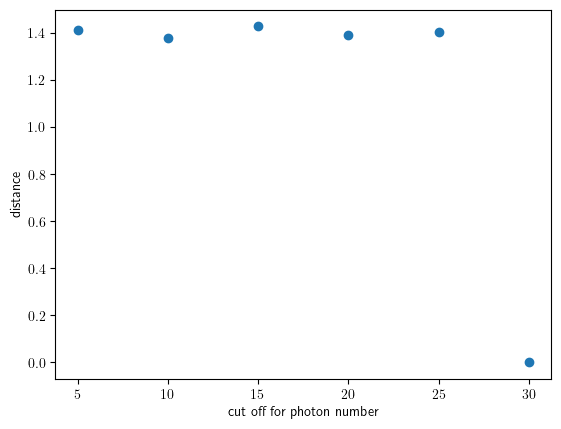

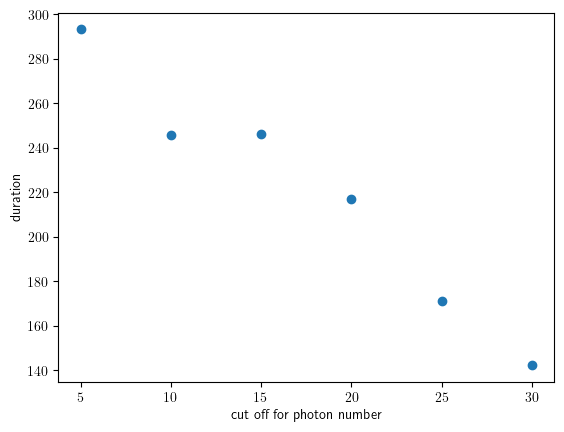

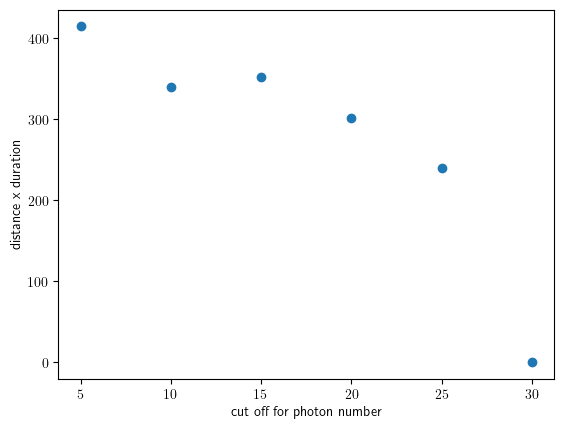

In [6]:
def plot_test(test: str):
    series = data[test]
    parameter_list = list(series.keys())
    ref_parameters = parameter_list[0]
    ref_run = series[ref_parameters]
    print(ref_parameters)
    for k, run in series.items():
        vec = run["final vector"][0]
        ref_vec = ref_run["final vector"][0]
        dim_difference = ref_vec.shape[0] - vec.shape[0]
        if dim_difference > 0:
            vec = np.pad(vec, [(0, dim_difference)], mode="constant")
        if dim_difference < 0:
            ref_vec = np.pad(ref_vec, [(0, -dim_difference)], mode="constant")

        series[k]["distance"] = np.linalg.norm(vec - ref_vec)

    print([series[k]["distance"] for k in series.keys()])

    parameter_index = {
        "test cut_off": 0,
        "test iterations": 1,
        "test time_step": 2,
    }

    parameter_name = {
        "test cut_off": "cut off for photon number",
        "test iterations": "number of Lanczos iterations",
        "test time_step": "size $dt$ of time step during evolution",
    }

    test_parameter = list()
    distance = list()
    duration = list()
    norm = list()
    for k, v in series.items():
        test_parameter.append(k[parameter_index[test]])
        distance.append(v["distance"])
        duration.append(v["duration"])
        norm.append(np.linalg.norm(v["final vector"][0]))

    test_parameter = np.array(test_parameter)
    distance = np.array(distance)
    duration = np.array(duration)
    norm = np.array(norm)

    plt.rcParams.update(
        {
            "text.usetex": True,
        }
    )
    x = test_parameter
    # if test == "test cut_off":
    #     error = norm
    #     error_name = r"$\Vert v\Vert$"
    # else:
    #     error = distance
    #     error_name = "distance to reference"

    for y, y_name in zip(
        [distance, duration, distance * duration],
        [
            "distance",
            "duration",
            "distance x duration",
        ],
    ):
        plt.scatter(x, y)
        plt.xlabel(parameter_name[test])
        plt.ylabel(y_name)
        # if test == "test time_step":
        #     plt.xlim(0,1)
        plt.show()


plot_test("test cut_off")

(30, 60, 0.001)
[np.float64(0.0), np.float64(1.4045315128938307), np.float64(1.3923402398794802), np.float64(1.4290695670626365), np.float64(1.3810128274850901), np.float64(1.4145919221223624)]


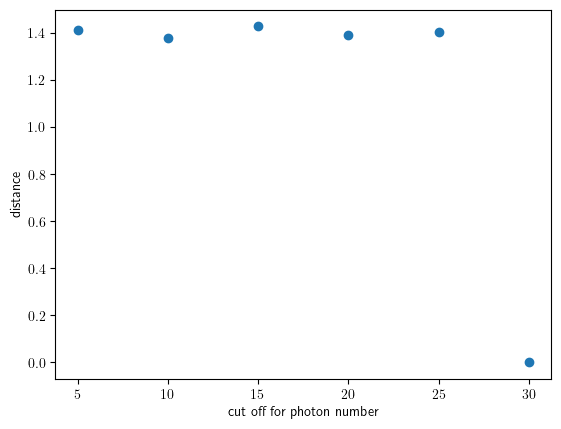

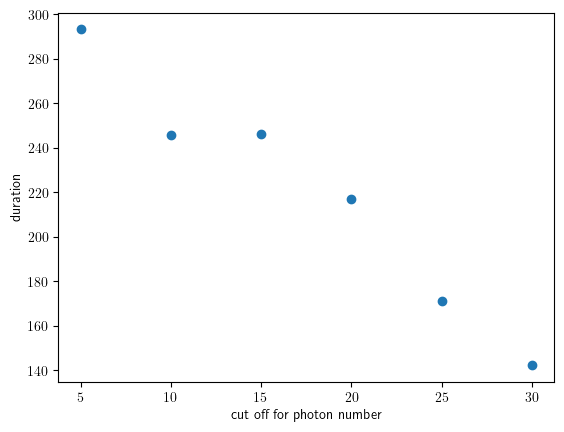

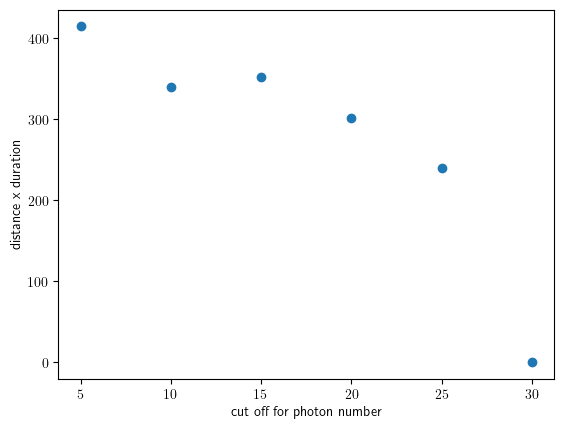

(30, 60, 0.001)
[np.float64(0.0), np.float64(2.4390780525155177e-13), np.float64(2.445568863117786e-13), np.float64(2.4411338403763844e-13), np.float64(2.443032736504831e-13), np.float64(4.122341456760963e-11), np.float64(2.5905878963881833e-06), np.float64(1.4099525703303464), np.float64(1.5504629654911424)]


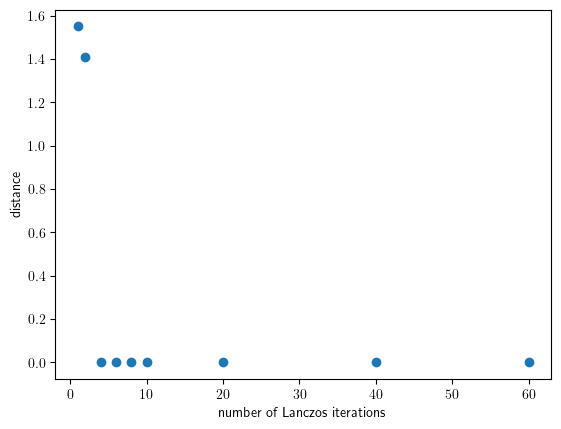

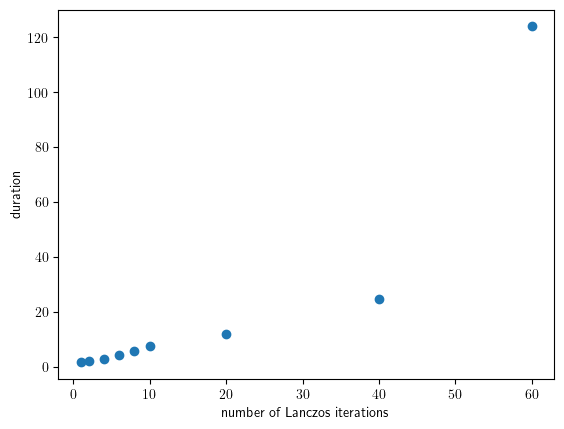

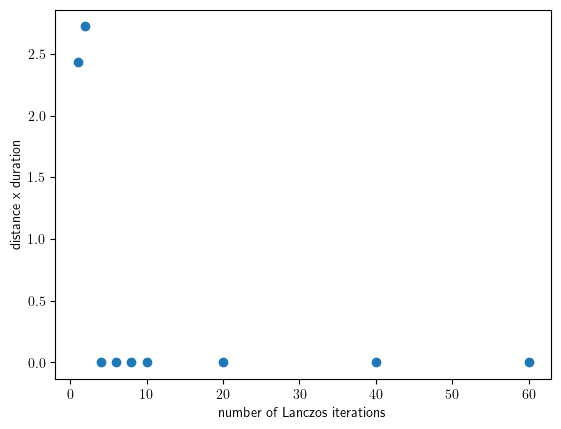

(30, 60, 0.001)
[np.float64(0.0), np.float64(0.036270319385604106), np.float64(0.38667893846276385), np.float64(1.3760870153738434), np.float64(1.6152456425256347), np.float64(1.4282951371609485)]


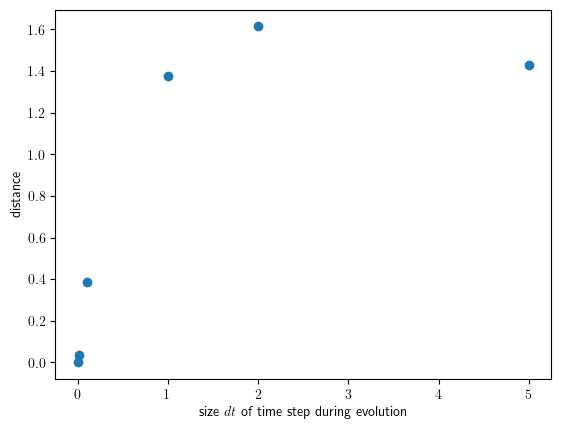

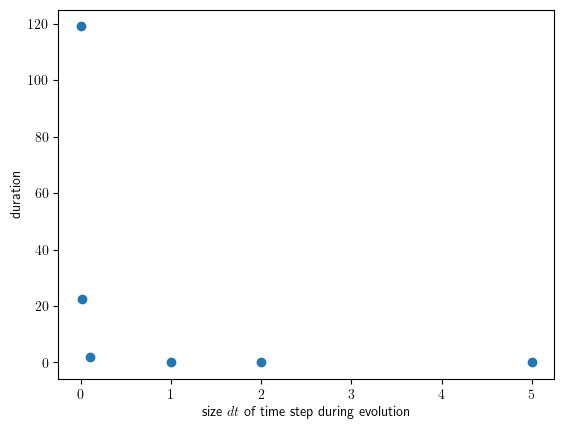

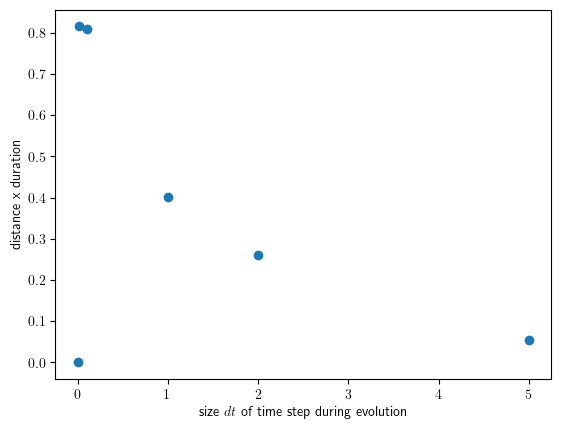

In [7]:
for test in data.keys():
    plot_test(test)

In [8]:
# picked parameters
picked_cut_off = 20  # 2*N
picked_iterations = 10
time_steps = list(data["test time_step"].keys())
time_steps.sort(key=lambda x: x[2])
picked_time_step = time_steps[1][2]
print(f"cut_off factor of N: {picked_cut_off/10}")
print(f"Lanczos iterations: {picked_iterations}")
print(f"time_step factor of T: {picked_time_step/10}")


cut_off factor of N: 2.0
Lanczos iterations: 10
time_step factor of T: 0.001


In [9]:
picked_time_step

0.01